In [ ]:
#|default_exp app

## Gradio Pets

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

In [3]:
import os
os.getcwd()

'/Users/bytedance/llmpath/fastbook/lesson-03'

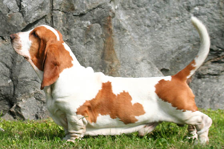

In [4]:
im = PILImage.create('basset.jpg')
im.thumbnail((224,224))
im

In [5]:
#export
learn = load_learner('model.pkl')

/Users/bytedance/venv/lib/python3.13/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [6]:
learn.dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [7]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([8.7158e-06, 1.6648e-05, 4.1244e-06, 4.5631e-07, 7.1343e-08, 1.6990e-05,
         4.2377e-06, 3.4377e-06, 5.0311e-07, 4.1622e-07, 2.5373e-06, 4.5711e-06,
         8.6013e-05, 2.9882e-04, 9.9558e-01, 2.0184e-03, 4.1014e-05, 2.1688e-07,
         3.4267e-05, 1.3422e-06, 1.1557e-05, 8.4411e-07, 1.1740e-05, 3.8559e-05,
         2.3164e-06, 3.5820e-07, 1.3608e-07, 4.4899e-07, 1.1011e-06, 1.5942e-06,
         1.7833e-03, 1.0706e-05, 6.2058e-06, 4.0713e-07, 2.4651e-06, 8.9976e-07,
         4.3364e-06]))

In [8]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [9]:
classify_image(im)

{'Abyssinian': 8.715815965842921e-06,
 'Bengal': 1.6647543816361576e-05,
 'Birman': 4.124404313188279e-06,
 'Bombay': 4.563064806006878e-07,
 'British_Shorthair': 7.134335788805402e-08,
 'Egyptian_Mau': 1.6989670257316902e-05,
 'Maine_Coon': 4.237747361912625e-06,
 'Persian': 3.4377185329503845e-06,
 'Ragdoll': 5.031108116781979e-07,
 'Russian_Blue': 4.1622010371611395e-07,
 'Siamese': 2.5372621621500002e-06,
 'Sphynx': 4.571072167891543e-06,
 'american_bulldog': 8.601266017649323e-05,
 'american_pit_bull_terrier': 0.00029882349190302193,
 'basset_hound': 0.99558025598526,
 'beagle': 0.0020183641463518143,
 'boxer': 4.101433660252951e-05,
 'chihuahua': 2.168786039646875e-07,
 'english_cocker_spaniel': 3.426735202083364e-05,
 'english_setter': 1.3421713447314687e-06,
 'german_shorthaired': 1.1556781828403473e-05,
 'great_pyrenees': 8.441107297585404e-07,
 'havanese': 1.1739546607714146e-05,
 'japanese_chin': 3.8559326640097424e-05,
 'keeshond': 2.3164027425082168e-06,
 'leonberger': 3.5

In [ ]:
#export
import gradio as gr
image = gr.Image(height=192, width=192)
label = gr.Label()
examples = ['basset.jpg']

In [ ]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

In [10]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [11]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2554e+00,  1.9198e+00,  1.2210e+00,  1.0399e+00, -2.2787e-03,
          7.6549e-01,  8.8737e-01,  1.6320e+00,  7.0469e-01,  3.2883e+00,
          7.8548e-01, -4.9768e-04,  1.0024e+00, -2.3291e-03,  3.2953e+00,
         -1.3187e-03,  1.9846e+00,  1.0198e+00,  4.4517e+00,  2.5630e-01,
          2.7241e+00,  9.2619e-01,  1.2367e+00,  4.8773e-03,  1.7885e+00,
          5.4475e-01,  4.6261e+00,  1.1030e-02, -2.0937e-03,  3.4472e+00,
          1.3522e+00,  4.1259e+00,  2.6881e+00,  4.1203e+00,  3.3991e+00,
          8.4972e-01,  7.3700e-01,  3.9801e+00,  1.2849e+00,  6.4057e-01,
          2.6912e+00,  1.1180e+00,  1.1687e+00,  5.5456e-01,  2.3341e+00,
          1.5329e-03,  9.7024e-01,  6.4695e-04,  1.1966e+00,  1.7896e+00,
          4.0153e-01,  4.4971e-01,  9.7205e-01,  3.9899e+00,  6.5827e-01,
          6.8782e-01,  9.8717e-01,  2.7065e+00,  1.2176e+00,  7.6349e-01,
          3.3022e+00,  1.6181e+00,  9.5562e-01,  2.1202e+00,  6.3030e-01,
          4.032

In [ ]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())